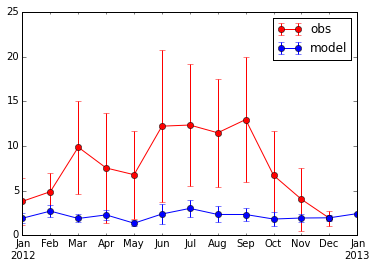

In [4]:
%matplotlib inline

import pandas as pd
import netCDF4
import romspy
import matplotlib.pyplot as plt
import numpy as np
import netCDF4

obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-3.nc'
stafile = 'Z:/roms/Apps/OB500_fennelP/NL09/ob500_sta.nc'

obs = netCDF4.Dataset(obsfile, 'r')
obs_station = obs.variables['obs_station'][:]
obs_depth = obs.variables['obs_depth'][:]
obs_type = obs.variables['obs_type'][:]

sta = netCDF4.Dataset(stafile, 'r')


def obs_plot(station, depth, varid):
    index = np.where((obs_station==station) & (obs_depth==depth) & (obs_type==varid))[0]
    obs_time = obs.variables['obs_time'][index]
    obs_value = obs.variables['obs_value'][index]
    obs_time2 = netCDF4.num2date(obs_time, romspy.JST_days)
    s = pd.Series(obs_value, index=obs_time2)
    period = 'M'
    mean = s.resample(period, how='mean')
    std = s.resample(period, how='std')
    mean.plot(yerr=std, fmt='ro-', label='obs')
    plt.ylim(ymin=0, ymax=25)
    
    
def sta_plot(station):
    time = sta.variables['ocean_time'][:]
    time = netCDF4.num2date(time, romspy.JST)
    var = sta.variables['chlorophyll'][:,station-1,19]
    #var = sta.variables['phytoplankton'][:,station-1,19]
    s2 = pd.Series(var, index=time)
    period = 'M'
    mean = s2.resample(period, how='mean')
    std = s2.resample(period, how='std')
    mean.plot(yerr=std, fmt='bo-', label='model')
    plt.legend()

depth=-1.0
varid=10
obs_plot(12, depth, varid)
sta_plot(12)

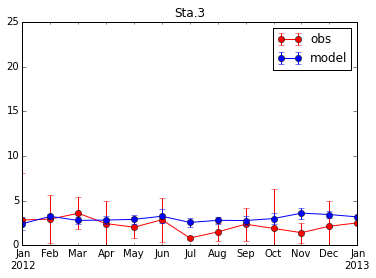

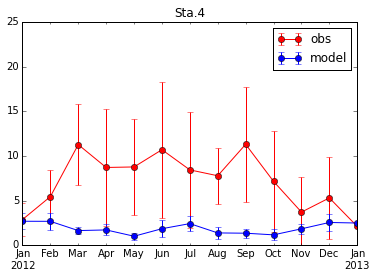

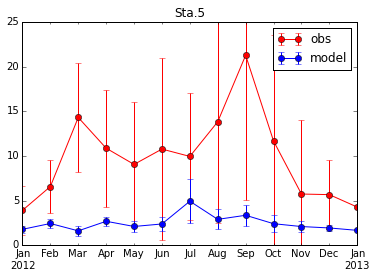

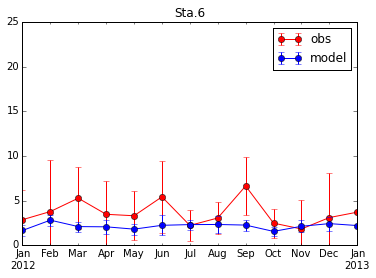

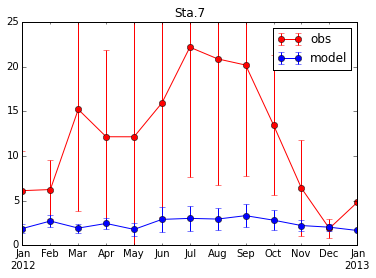

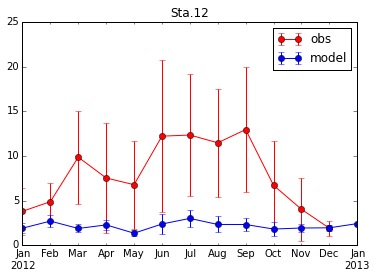

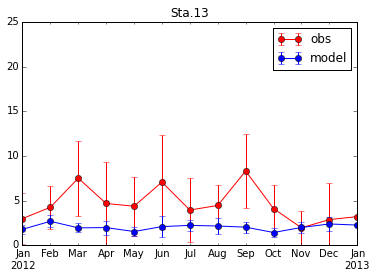

In [15]:
depth=-1.0
varid=10
for i in [3,4,5,6,7,12,13]:
    if i == 5: 
        mean_plot(i, -0.7, varid)
    else: 
        mean_plot(i, depth, varid)
    plot2(i)
    plt.title('Sta.{}'.format(i))
    plt.show()